In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dados = "https://raw.githubusercontent.com/SandraRojasZ/Pos_Tech_Data_Analytics/main/Base_de_Dados/data.csv"
#dados = pd.read_csv("data.csv", sep=",")

In [3]:
dados = pd.read_csv(dados)
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
dados['date'] = pd.to_datetime(dados['date'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [5]:
# Extract numerical features for correlation analysis
numerical_features = dados.select_dtypes(include=np.number)

Padronização dos Dados

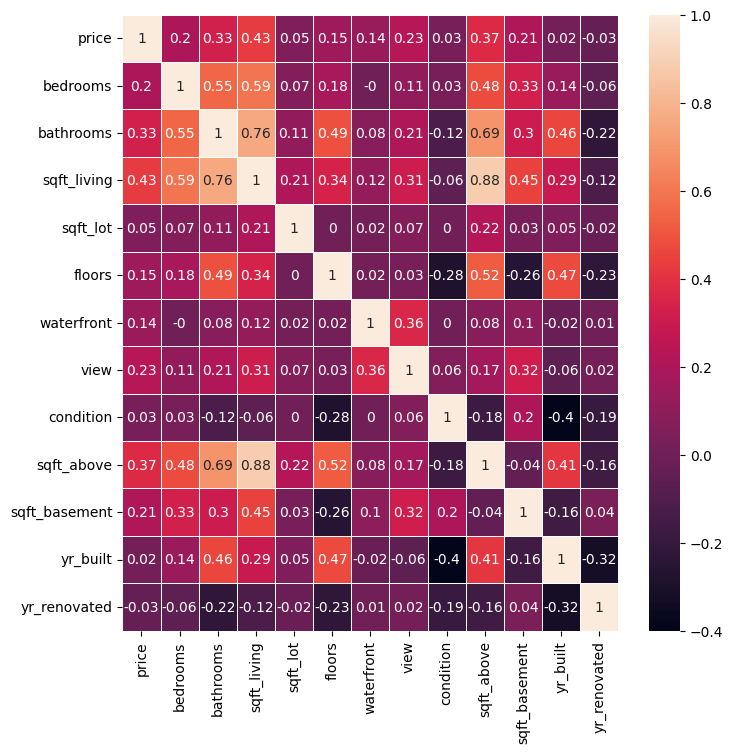

In [6]:
correlation_matrix = numerical_features.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [7]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

<Axes: xlabel='sqft_living', ylabel='price'>

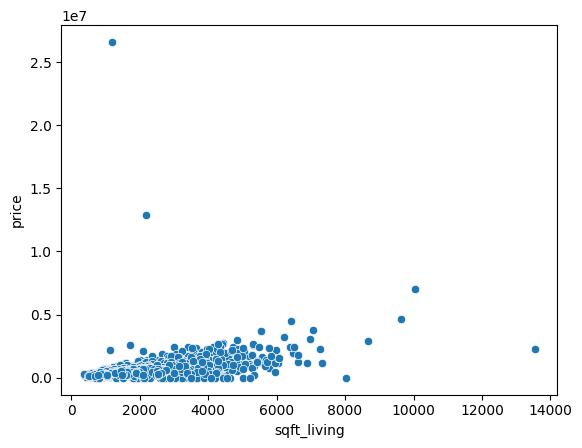

In [8]:
sns.scatterplot(data=dados, x="sqft_living", y="price")

<Axes: xlabel='bathrooms', ylabel='price'>

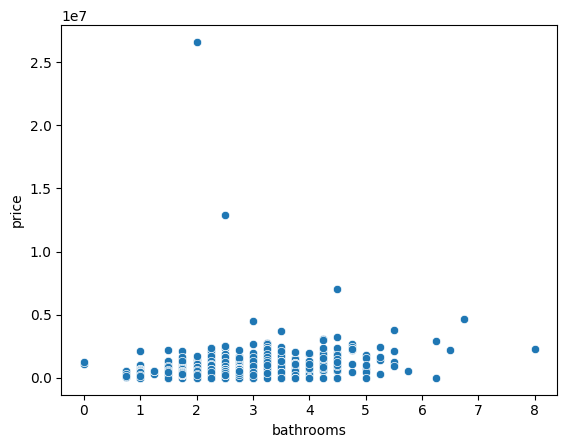

In [9]:
sns.scatterplot(data=dados, x="bathrooms", y="price")

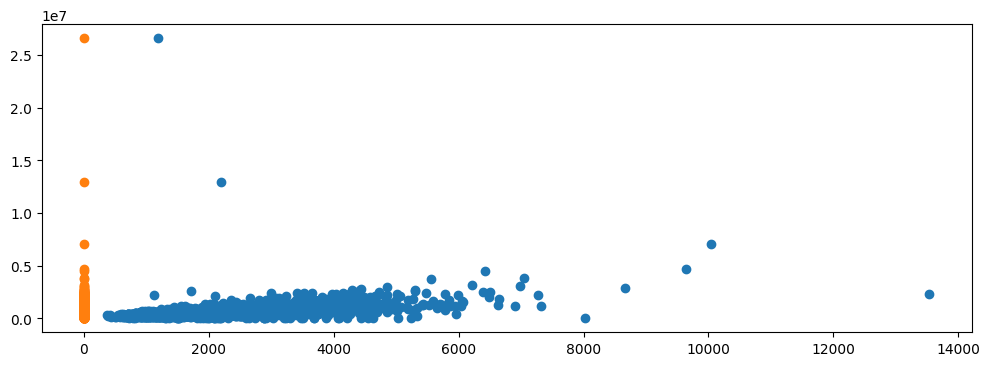

In [10]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x[:,0], y);
ax.scatter(x[:,1], y);

<Axes: xlabel='sqft_living', ylabel='Count'>

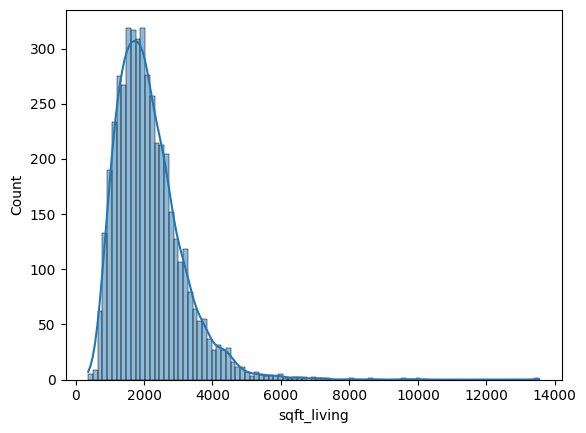

In [11]:
sns.histplot(data=dados, x="sqft_living", kde=True)
# pelo Gráfico consigo verificar que há outliers

<Axes: xlabel='bathrooms', ylabel='Count'>

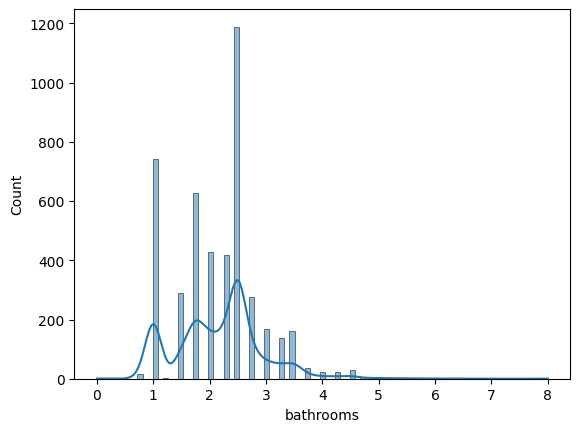

In [12]:
sns.histplot(data=dados, x="bathrooms", kde=True)
# pelo Gráfico consigo verificar que há outliers

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
# Padronização

scaler = StandardScaler()

x_std = scaler.fit_transform(x)

In [16]:
# Ver a padronização da Escala
x

array([[1.34e+03, 1.50e+00],
       [3.65e+03, 2.50e+00],
       [1.93e+03, 2.00e+00],
       ...,
       [3.01e+03, 2.50e+00],
       [2.09e+03, 2.00e+00],
       [1.49e+03, 2.50e+00]])

In [18]:
# Na mesma escala
x_std

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]])

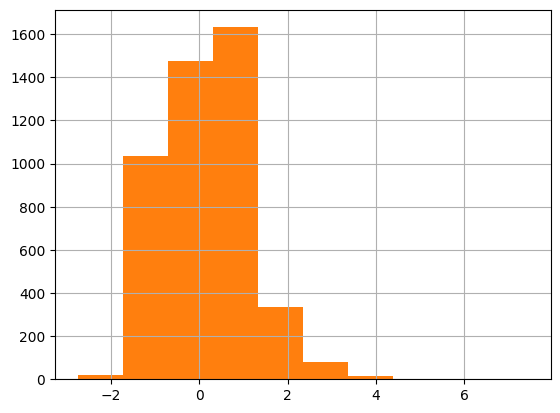

In [20]:
x_std = pd.DataFrame(x_std, columns=["sqt_living", "bathrooms"])
x_std.sqt_living.hist();
x_std.bathrooms.hist();

**Feature Scaling em modelos de machine learning**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
dados.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [23]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

In [26]:
len(x_train)

3450

In [27]:
len(x_test)

1150

In [29]:
scaler = MinMaxScaler()
# Normalizando os Dados
scaler.fit(x_train)

MinMaxScaler()

In [30]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
# Escala de 0 a 1
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

In [32]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test_scaled)

In [38]:
# Forma de avaliar o Modelo com Padronização
# r2 ficou mto abaixo mesmo com a padronização
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("R2: ", r2)

MAE:  173536.74188212887
R2:  0.460589559677016


In [36]:
# Forma de avaliar o Modelo sem Padronização
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred_normal = model_normal.predict(x_test)

In [39]:
# Forma de avaliar o Modelo sem Padronização
# r2 ficou mto abaixo sem a padronização
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)

print("MAE: ", MAE)
print("R2: ", r2)

MAE:  173536.74188212893
R2:  0.4605895596770161
